In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('../../DataSets/Rainfall/rainfall_1901-2017.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
# Shape of data
data.shape

(4188, 19)

In [5]:
# Checking datatypes of columns
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
JF             float64
MAM            float64
JJAS           float64
OND            float64
dtype: object

In [6]:
# Checking null values
pd.isnull(data).sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [7]:
# Droping rows with null values

data.dropna(inplace = True)

In [8]:
data.shape

(4162, 19)

In [9]:
# Checking number unique values in data

data.nunique()

SUBDIVISION      36
YEAR            117
JAN             802
FEB             897
MAR             985
APR            1237
MAY            1736
JUN            2738
JUL            3079
AUG            2939
SEP            2656
OCT            1951
NOV            1236
DEC             803
ANNUAL         3770
JF             1217
MAM            2274
JJAS           3721
OND            2400
dtype: int64

## Macro level Insights :
1. SUBDIVISION wise average annual rainfall during 1901 to 2017.
2. SUBDIVISION wise minimum annual rainfall with corresponding year.
3. SUBDIVISION wise maximum annual rainfall with corresponding year.
4. SUBDIVISION wise minimum average monthly rainfall with corresponding month during 1901-2017.
5. SUBDIVISION wise maximum average monthly rainfall with corresponding month during 1901-2017.

In [10]:
# Setting x-ticks on both top and bottom axis
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

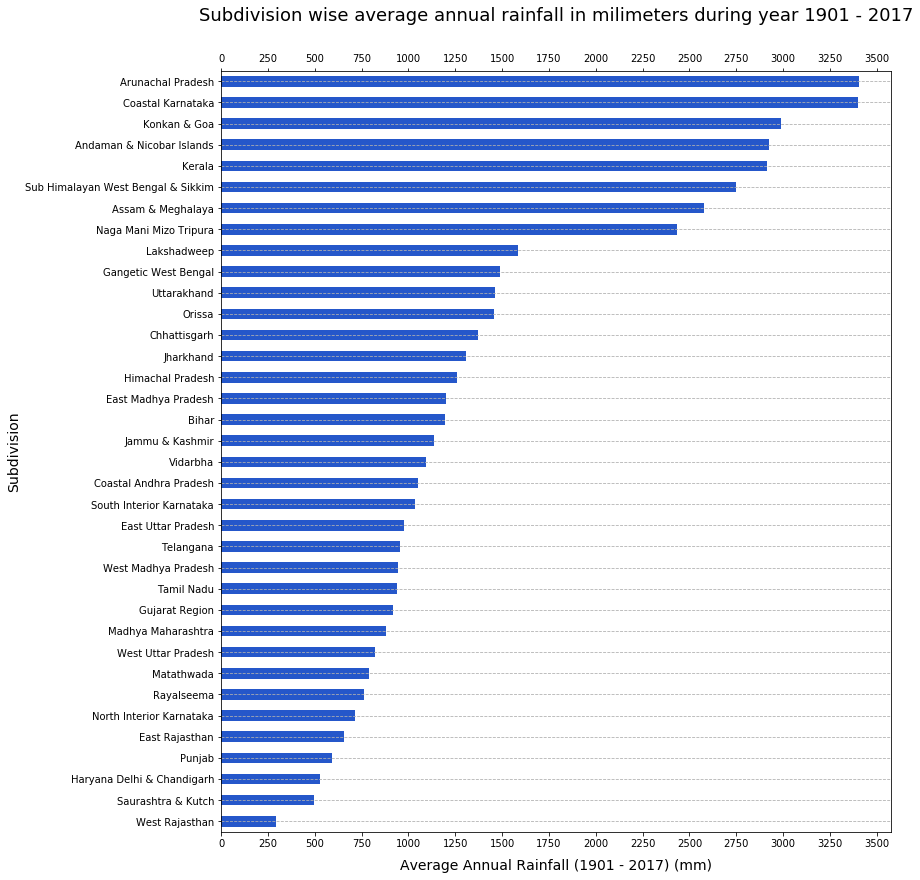

In [11]:
# SUBDIVISION wise average annual rainfall from year 1901 to 2017

avg_rainfall = data.groupby(by = 'SUBDIVISION').mean()[['ANNUAL']].sort_values(by = 'ANNUAL').reset_index()

avg_rainfall.plot(x = 'SUBDIVISION', y = 'ANNUAL', kind = 'barh', figsize = (12,14), legend = False, color = '#2557ca')
plt.title('Subdivision wise average annual rainfall in milimeters during year 1901 - 2017', fontdict = {'fontsize' : 18}, pad = 50)
plt.xticks(ticks = [i for i in range(0, 3501, 250)])
plt.xlabel('Average Annual Rainfall (1901 - 2017) (mm)', fontdict = {'fontsize' : 14}, labelpad = 10)
plt.ylabel('Subdivision', fontdict = {'fontsize' : 14})
plt.grid(axis = 'y', ls = '--')
plt.show()

In [12]:
# SUBDIVISION wise minimum annual rainfall with corresponding year

min_rainfall = data.groupby(by = 'SUBDIVISION').min()[['ANNUAL']].sort_values(by = 'ANNUAL').reset_index()

def extract_years(x):
    years = []
    
    for i in range(len(x)):
        year = data[
            (data['SUBDIVISION'] == x.iloc[i, 0]) & 
            (data['ANNUAL'] == x.iloc[i, 1])]['YEAR'].iloc[0]
        years.append(year)
        
    return years

min_rainfall['YEAR'] = extract_years(min_rainfall)

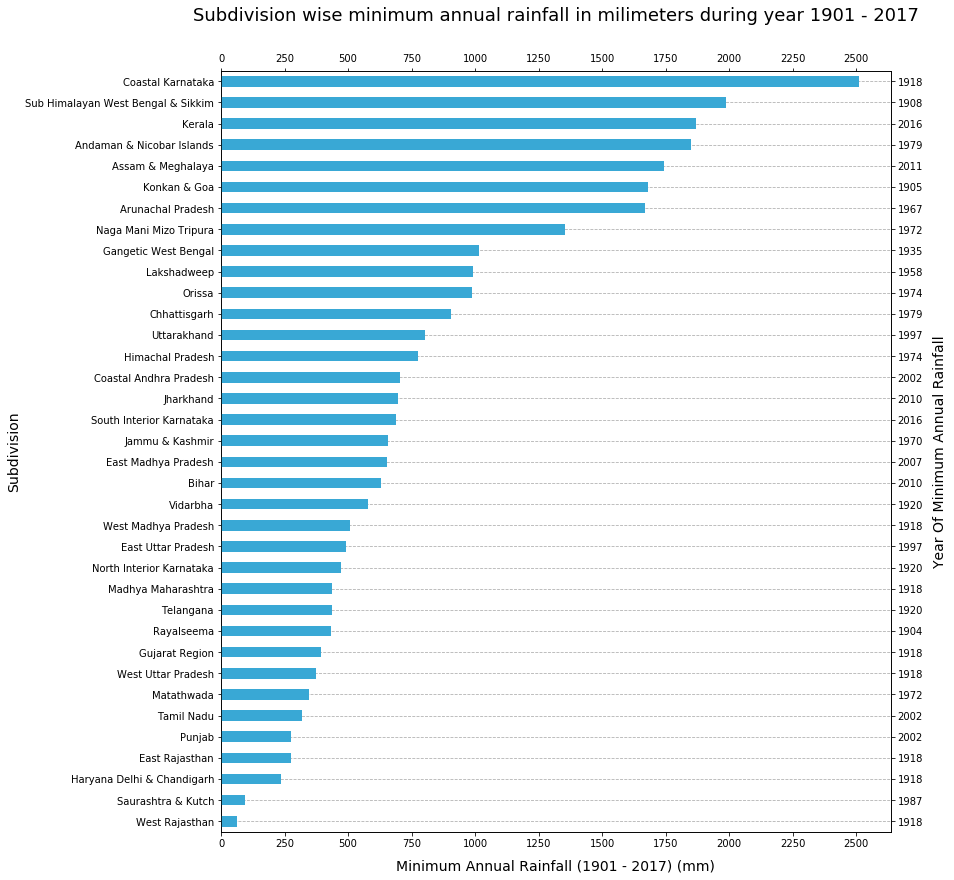

In [13]:
# Creating plot, subplots is used to customize y-axis labels on right side

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Used to create two y-axis (left and right) with one sharing x-axis

min_rainfall.plot(x = 'SUBDIVISION', y = 'ANNUAL', kind = 'barh', figsize = (12,14), legend = False, ax = ax1, color = '#39a8d5')
min_rainfall.plot(x = 'YEAR', y = 'ANNUAL', kind = 'barh', figsize = (12,14), legend = False, ax = ax2, color = '#39a8d5')

ax1.set_xticks(ticks = [i for i in range(0, 2501, 250)])
ax1.set_title('Subdivision wise minimum annual rainfall in milimeters during year 1901 - 2017', fontdict = {'fontsize' : 18}, pad = 50)
ax1.set_xlabel('Minimum Annual Rainfall (1901 - 2017) (mm)', fontdict = {'fontsize' : 14}, labelpad = 10)
ax1.set_ylabel('Subdivision', fontdict = {'fontsize' : 14})
ax2.set_ylabel('Year Of Minimum Annual Rainfall', fontdict = {'fontsize' : 14}, labelpad = 10)

ax1.yaxis.grid(ls = '--')

plt.show()

In [14]:
# SUBDIVISION wise minimum annual rainfall with corresponding year

max_rainfall = data.groupby(by = 'SUBDIVISION').max()[['ANNUAL']].sort_values(by = 'ANNUAL').reset_index()
max_rainfall['YEAR'] = extract_years(max_rainfall) # Calling extract_years function defined above

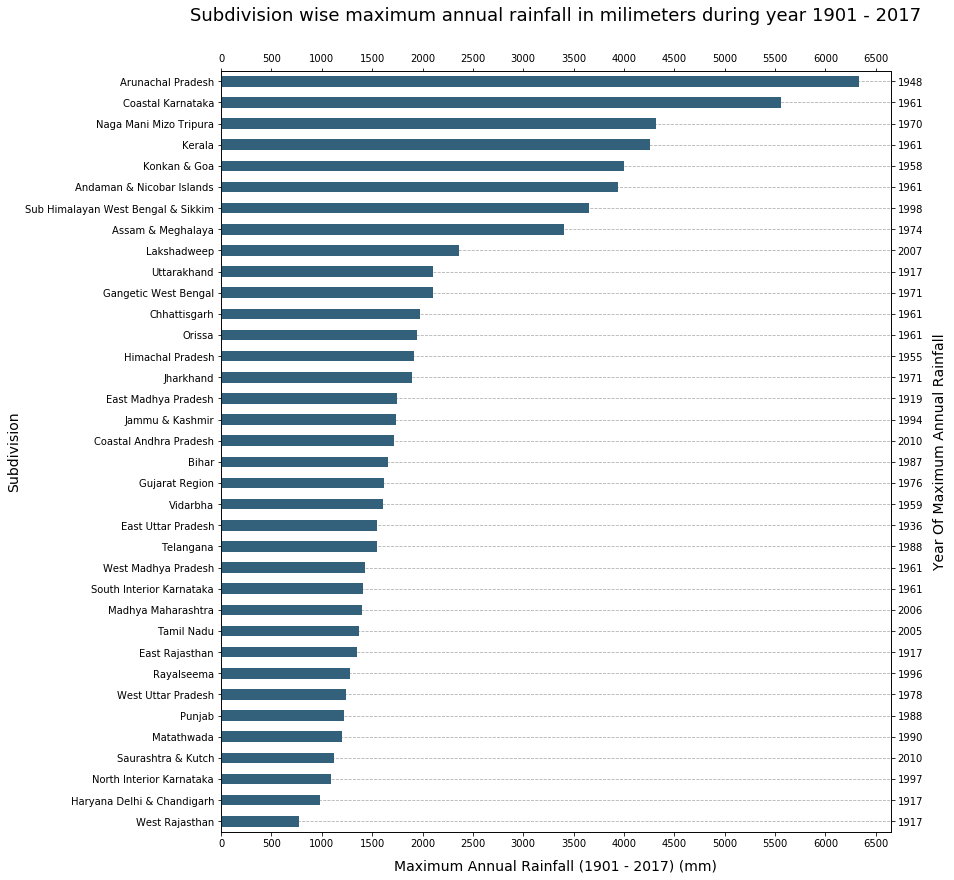

In [15]:
# Creating plot, subplots is used to customize y-axis labels on right side

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Used to create two y-axis (left and right) with one sharing x-axis

max_rainfall.plot(x = 'SUBDIVISION', y = 'ANNUAL', kind = 'barh', figsize = (12,14), legend = False, ax = ax1, color = '#33607a')
max_rainfall.plot(x = 'YEAR', y = 'ANNUAL', kind = 'barh', figsize = (12,14), legend = False, ax = ax2, color = '#33607a')

ax1.set_xticks(ticks = [i for i in range(0, 6501, 500)])
ax1.set_title('Subdivision wise maximum annual rainfall in milimeters during year 1901 - 2017', fontdict = {'fontsize' : 18}, pad = 50)
ax1.set_xlabel('Maximum Annual Rainfall (1901 - 2017) (mm)', fontdict = {'fontsize' : 14}, labelpad = 10)
ax1.set_ylabel('Subdivision', fontdict = {'fontsize' : 14})
ax2.set_ylabel('Year Of Maximum Annual Rainfall', fontdict = {'fontsize' : 14}, labelpad = 10)

ax1.yaxis.grid(ls = '--')

plt.show()

In [16]:
# SUBDIVISION wise minimum average monthly rainfall with corresponding month during 1901-2017.

min_avg_rainfall = data.groupby(by = 'SUBDIVISION').mean().iloc[:, 1:13]
min_avg_rainfall = pd.DataFrame({
    'MINIMUM_RAINFALL' : min_avg_rainfall.min(axis = 1),
    'MONTH' : min_avg_rainfall.idxmin(axis = 1)
}).reset_index().sort_values(by = 'MINIMUM_RAINFALL')

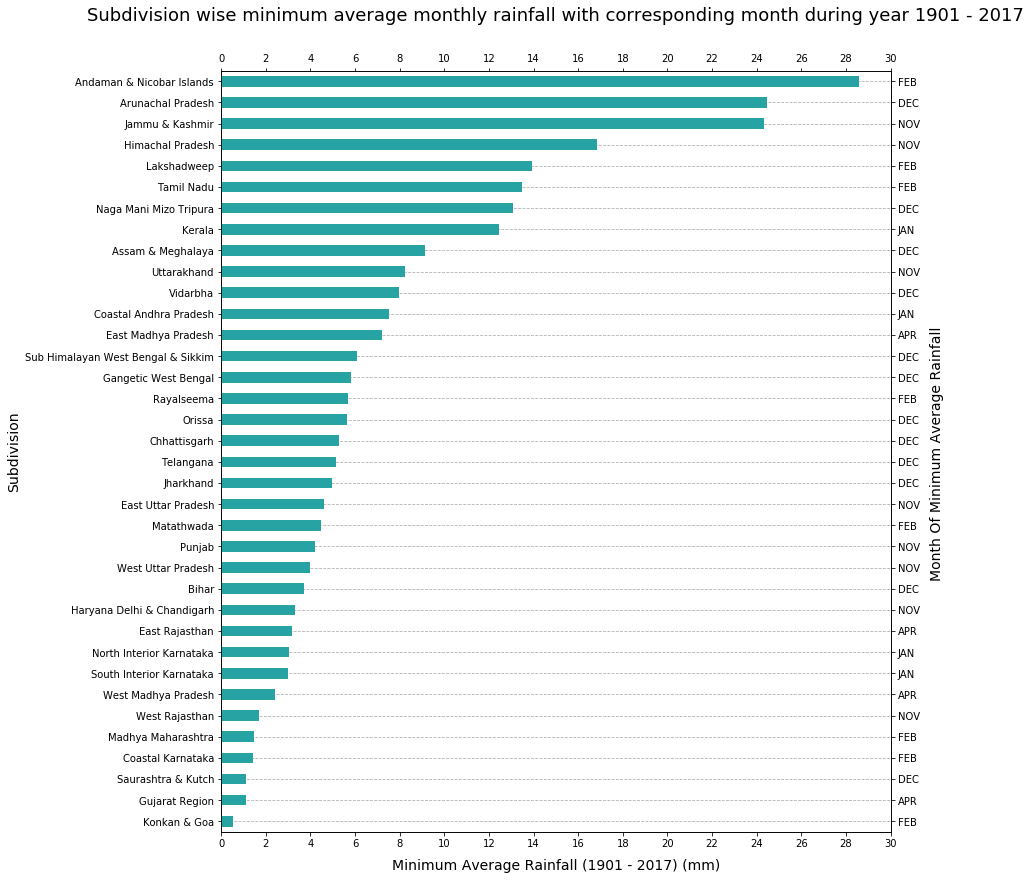

In [17]:
# Creating plot, subplots is used to customize y-axis labels on right side

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Used to create two y-axis (left and right) with one sharing x-axis

min_avg_rainfall.plot(x = 'SUBDIVISION', y = 'MINIMUM_RAINFALL', kind = 'barh', figsize = (12,14), legend = False, ax = ax1, color = '#27a3a3')
min_avg_rainfall.plot(x = 'MONTH', y = 'MINIMUM_RAINFALL', kind = 'barh', figsize = (12,14), legend = False, ax = ax2, color = '#27a3a3')

ax1.set_xticks(ticks = [i for i in range(0, 31, 2)])
ax1.set_title('Subdivision wise minimum average monthly rainfall with corresponding month during year 1901 - 2017', fontdict = {'fontsize' : 18}, pad = 50)
ax1.set_xlabel('Minimum Average Rainfall (1901 - 2017) (mm)', fontdict = {'fontsize' : 14}, labelpad = 10)
ax1.set_ylabel('Subdivision', fontdict = {'fontsize' : 14})
ax2.set_ylabel('Month Of Minimum Average Rainfall ', fontdict = {'fontsize' : 14}, labelpad = 10)

ax1.yaxis.grid(ls = '--')

plt.show()

In [18]:
# SUBDIVISION wise minimum average monthly rainfall with corresponding month during 1901-2017.

max_avg_rainfall = data.groupby(by = 'SUBDIVISION').mean().iloc[:, 1:13]
max_avg_rainfall = pd.DataFrame({
    'MAXIMUM_RAINFALL' : max_avg_rainfall.max(axis = 1),
    'MONTH' : max_avg_rainfall.idxmax(axis = 1)
}).reset_index().sort_values(by = 'MAXIMUM_RAINFALL')

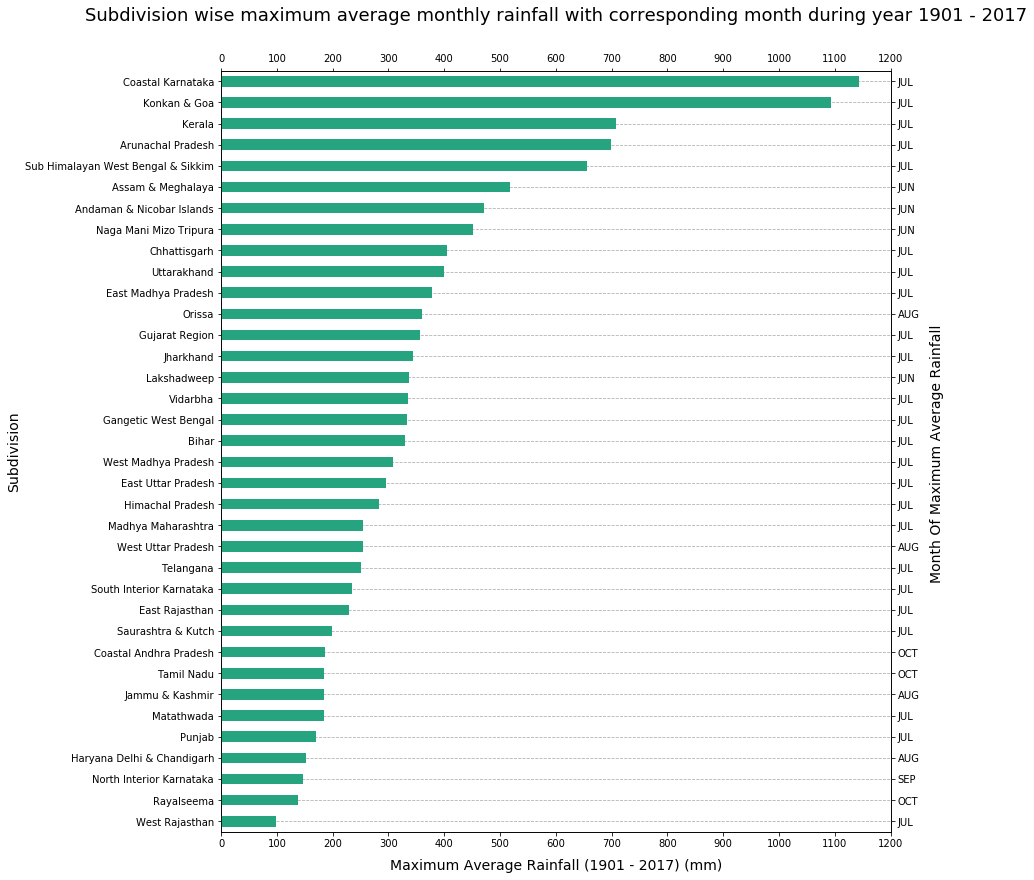

In [19]:
# Creating plot, subplots is used to customize y-axis labels on right side

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Used to create two y-axis (left and right) with one sharing x-axis

max_avg_rainfall.plot(x = 'SUBDIVISION', y = 'MAXIMUM_RAINFALL', kind = 'barh', figsize = (12,14), legend = False, ax = ax1, color = '#25a47f')
max_avg_rainfall.plot(x = 'MONTH', y = 'MAXIMUM_RAINFALL', kind = 'barh', figsize = (12,14), legend = False, ax = ax2, color = '#25a47f')

ax1.set_xticks(ticks = [i for i in range(0, 1201, 100)])
ax1.set_title('Subdivision wise maximum average monthly rainfall with corresponding month during year 1901 - 2017', fontdict = {'fontsize' : 18}, pad = 50)
ax1.set_xlabel('Maximum Average Rainfall (1901 - 2017) (mm)', fontdict = {'fontsize' : 14}, labelpad = 10)
ax1.set_ylabel('Subdivision', fontdict = {'fontsize' : 14})
ax2.set_ylabel('Month Of Maximum Average Rainfall ', fontdict = {'fontsize' : 14}, labelpad = 10)

ax1.yaxis.grid(ls = '--')

plt.show()

### Let's check unique months in which there was minimum average rainfall during 1901 - 2017

In [20]:
print('Months in which minimum rainfall occured during 1901 - 2017 : \n{}'.format(min_avg_rainfall['MONTH'].value_counts()))

Months in which minimum rainfall occured during 1901 - 2017 : 
DEC    12
NOV     8
FEB     8
JAN     4
APR     4
Name: MONTH, dtype: int64


As we can see above, minimum average rainfall occured in months <b>Feburary, April, December, November, January </b>. This is evident from the fact that these months do not come under rainy season, and hence minimum average rainfall was recorded in these months. 

### Let's check unique months in which there was maximum average rainfall during 1901 - 2017

In [21]:
print('Months in which maximum rainfall occured during 1901 - 2017 : \n{}'.format(max_avg_rainfall['MONTH'].value_counts()))

Months in which maximum rainfall occured during 1901 - 2017 : 
JUL    24
JUN     4
AUG     4
OCT     3
SEP     1
Name: MONTH, dtype: int64


As we can see above, maximum average rainfall occured in months <b> July, October, September, August, June </b>. In 24 subdivisions in India maximum average rainfall was recorded in the month of <b>July</b> as per the data. These months come under rainy season in India and so maximum average rainfall was recorded during these months.